# A Equação de Klein-Gordon em 1D - Uma abordagem simplificada

* PET - Física UFRN
* Petianos: Paulo Henrique Cunha Pacheco
* Data: 06/06/2025

Este `notebook` tem como foco explorar a Equação de Klein-Gordon, abordando sua solução analítica e o contexto em que tais soluções surgem, bem como explorar sua solução numérica por meio do método das diferenças finitas. Assim, o presente `notebook` pode ser dividido nas seguintes partes:

* A Equação de Klein-Gordon em 1D e sua solução analítica;
* O Método das Diferenças Finitas;
* Solução numérica da equação de Klein-Gordon em 1D;
* Conclusão;
* Referências.

No primeiro tópico, será abordado resumidademente o que é a Equação de Klein-Gordon, bem como seu contexto de uso, importância e variações. Além disso, ainda no primeiro tópico, será apresentada a solução analítica para a Equação de Klein-Gordon em 1D (1 + 1) e o gráfico da solução em três dimensões. Na segunda parte, é apresentado brevemente o método de diferenças finitas e o por que ele pode ser aplicado a este caso. Agora, de posse do método das diferenças finitas, na terceira parte, será feita a solução numérica da Equação de Klein-Gordon em 1D e gráficos em 3D nos ajudarão a comparar os resultados da solução analítica com os resultados computacionais. Após isso, na conclusão, será então apresentado gráfico de diferença entre os métodos, onde observaremos a equivalencia e utilidade do método das diferenças finitas, bem como discutiremos novas aplicações para este método no contexto das variações da Equação de Klein-Gordon.

## Pré-requisitos

Para que a experiência com este `notebook` seja proveitosa, é recomendável ao leitor que tenha certo conhecimento de programação em python, com ênfase em funções específicas utilizadas em física computacional, além de familiaridade com derivadas parciais e equações diferenciais. Não é exigido que o leitor tenha conhecimentos na área de física de particulas e campos, por isso, será elucidado de forma suficiente todo e qualquer conceito que seja importante mas não seja trivial.  

## Importando as bibliotecas

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Informaçãoes sobre as bibliotecas

In [5]:
%load_ext version_information
%version_information matplotlib.pyplot, numpy mpl.toolkits.mplot3d

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.10.9 64bit [MSC v.1934 64 bit (AMD64)]
IPython 8.37.0
OS Windows 10 10.0.26100 SP0
matplotlib.pyplot The 'matplotlib.pyplot' distribution was not found and is required by the application
numpympl.toolkits.mplot3d The 'numpympl.toolkits.mplot3d' distribution was not found and is required by the application
Tue Jun 03 23:20:39 2025 Hora Padrão de Buenos Aires

## 1. A equação de Klein-Gordon em 1D e sua solução analítica

### 1.1 Introdução

A Equação de Klein-Gordon é uma equação muito famosa na Teoria Quântica de Campos e é, tipicamente, uma equação de onda relativística que descreve campos escalares em geral, ou seja, partículas de spin 0 (bósons), isto é, particulas que não possuem momento angular intrínseco. Assim sendo, a Equação de Klein-Gordon é uma equação que descreve campos bosônicos e suas interações. Por ser uma equação de onda, descreve partículas, potenciais, interações e evolução temporal de bósons por meio de ondulações num determinado campo escalar $\phi$, que é definido em cada ponto do espaço e do tempo. Além disso, ser uma equação de onda relativística significa que ela respeita a covariância de Lorentz. Em outros termos, isso significa que a equação é invariante com relação à tranformações de coordenadas no espaço-tempo relativístico. A Equação de Klein-Gordon (a qual farei referência com a sigla KGE, de "Klein-Gordon Equation") pode possuir duas formas, uma forma mais simples, com termos de variação temporal e espacial explícitos (**Equação 1.1**) ou uma forma mais geral, utilizando o quadrivetor $x^{\mu} = (ct, \vec{x})$ (**Equação 1.2**):

$$ (\frac{1}{c^2}\frac{\partial^2}{\partial t^2} - \nabla^2 + \frac{m^2c^2}{\hbar^2})\phi(t,\vec{x}) = 0 \tag{1.1}$$

$$ou$$

$$ (\square + \mu^2)\phi = 0, \tag{1.2}$$

onde $m$ pode ser considerado a massa da partícula, $c$ é a velocidade da luz no vácuo, $\hbar$ é a constante de Planck dividida por $2\pi$ e $\mu = \frac{mc}{\hbar}$. Além disso, $\nabla^2$ é o operador Laplaciano e o símbolo $\square$ é chamado operador de onda, ou d'Alembertiano, que é definido em termos da métrica do espaço em questão, que no caso da KGE, é a métrica do espaço de Minkowsky $\eta_{\mu\nu}$. É importante considerarmos que, em Teoria Quântica de Campos, comumente toma-se $c = \hbar = 1$, que é uma consideração estranha, mas que adotaremos neste `notebook`.

Neste `notebook`, trabalharemos, por simplicidade, com a **Equação 1.1**, além disso, trataremos um campo $\phi = \phi(t,x)$, ou seja, dependente apenas de uma coordenada espacial e de uma temporal, por isso a KGE pode ser dita 1D (1+1). Esta forma mais simples da KGE pode ser compreendia, nos primeiros degraus do aprendizado, como uma equação de campo clássico contínuo, ou seja, trataremos aqui de uma equação com aspectos clássicos, e não quânticos, apesar de seu extenso uso como quantização de campos clássicos. 

### 1.2 A solução analítica por separação de variáveis

Nesta etapa, explicarei como chegar à solução analítica mais simples da KGE utilizando o método da separação de variáveis, que também será explicado devidamente. De inicio, vamos retomar a **Equação 1.1**:  

$$ (\frac{1}{c^2}\frac{\partial^2}{\partial t^2} - \nabla^2 + \frac{m^2c^2}{\hbar^2})\phi(t,\vec{x}) = 0,$$

como já mensionado, trateremos da KGE com apenas uma coordenada espacial e uma temporal, isso significa que o Laplaciano, naturalmente definido como um operador de segundas derivadas parciais em relação a cada uma das coordenadas do espaço, se reduz à $\nabla^2 = \frac{\partial^2}{\partial x^2}$. Assim, alterando o laplaciano e multiplicando todos os termos por $c^2$, temos:

$$ (\frac{\partial^2}{\partial t^2} - c^2\frac{\partial^2}{\partial x^2} + \frac{m^2c^4}{\hbar^2})\phi(t,\vec{x}) = 0. \tag{1.3}$$

fazendo atuar no nosso campo $\phi$ e denotando $\frac{m^2c^4}{\hbar^2} = b$:

$$\frac{\partial^2\phi}{\partial t^2} - c^2\frac{\partial^2\phi}{\partial x^2} + b\phi = 0. \tag{1.4}$$

Esta equação encontrada é uma Equação Diferencial Parcial Linear de Segunda Ordem Homogênea. Para tais equações diferenciais, podemos utilizar o método da separação de variáveis para encontrar a função $\phi$ que satisfaça a relação. Este método se baseia em supor, inicialmente, que as soluções são da forma $\phi(x,t) = X(x)T(t)$. Temos então que:

$$\frac{\partial^2\phi}{\partial t^2} = X(x)\frac{\partial^2T}{\partial t^2} ~~~~~~~ e ~~~~~~~ \frac{\partial^2\phi}{\partial x^2} = T(t)\frac{\partial^2X}{\partial x^2}. \tag{1.5}$$ 

Inserindo na equação e rearranjando:

$$X(x)\frac{\partial^2T(t)}{\partial t^2} = c^2T(t)\frac{\partial^2X(x)}{\partial x^2} - bX(x)T(t), \tag{1.6}$$

multiplicando ambos os membros da equação por $1 / X(x)T(t)$, temos então:

$$\frac{1}{T(t)}\frac{d^2 T(t)}{dt^2} = \frac{c^2}{X(x)}\frac{d^2X(x)}{dx^2} - b. \tag{1.7}$$

Observe que, no primeiro membro da equação há apenas termos de $t$ e no segundo membro, apenas termos de $x$. Com isso, podemos dizer que ambos são iguais à uma constante, que chamaremos $-\mu^2$. Assim, podemos escrever duas outra equações diferenciais mais simples:

$$\frac{1}{T(t)}\frac{d^2T(t)}{dt^2} = -\mu^2 ~~~~~ e ~~~~~ \frac{c^2}{X(x)}\frac{d^2X(x)}{dx^2} - b = -\mu^2. \tag{1.8}$$

Solucionando a primeira para encontrar $T(t)$: 

$$\frac{1}{T(t)}\frac{d^2T(t)}{dt^2} = -\mu^2 \implies \frac{d^2T(t)}{dt^2} = -\mu^2T(t) \implies \frac{d^2T(t)}{dt^2} + \mu^2T(t) = 0 \implies T(t) = Acos(\mu t) + Bsen(\mu t), \tag{1.9}$$

e solucionando a segunda para encontrar X(x):

$$\frac{c^2}{X(x)}\frac{d^2X(x)}{dx^2} - b = -\mu^2 \implies \frac{1}{X(x)}\frac{d^2X(x)}{dx^2} = \frac{-\mu^2 + b}{c^2} \implies \frac{d^2X(x)}{dx^2} = (\frac{-\mu^2 + b}{c^2})X(x) \implies \frac{d^2X(x)}{dx^2} + (\frac{\mu^2 - b}{c^2})X(x) = 0 \implies$$ 
$$\implies \frac{d^2X(x)}{dx^2} + \lambda^2X(x) \therefore$$ 
$$\therefore X(x) = C_1cos(\lambda x) + C_2sen(\lambda x). \tag{1.10}$$

Com isso, colocando na forma $\phi(x,t) = X(x)T(t)$ e explicitando os termos $\mu$ e $\lambda$ a solução geral da KGE em 1D é: 

$$\phi(x,t) = [C_1cos( { ( \frac{\mu^2 - b}{c^2} )x } ) + C_2sen((\frac{\mu^2 - b}{c^2})x)][Acos(\mu t) + Bsen(\mu t)], ~~com ~~ b = \frac{m^2c^4}{\hbar^2}. \tag{1.11}$$

Por fim, encontramos a expressão para o campo escalar $\phi$ que descreve particulas de spin 0, e devemos observar que a forma do campo, dadas certas condições iniciais, assume a configuração de uma soma de senos e cossenos que se altera no tempo, mostrando que a presença de particulas no espaço pode ser descrita como ondulações locais no campo $\phi$, tendo tais ondulações a característica de se propagar caso a particula esteja se movendo ao longo do tempo.

Devemos nos atentar a um fato importante da Equação de Klein-Gordon. Ela possui um método mais completo e trabalhoso de se obter soluções analíticas, que é por meio de Transformadas de Fourier. Além disso, algumas soluções da Equação de Klein-Gordon tem dependência das funções de Bessel comuns e modificadas, e isso mais uma vez aponta para a característica da KGE de apresentar particulas como ondulações no espaço, que em termos das funções de Bessel, poderiamos descrever como modos de vibração do campo escalar $\phi$.

### 1.3 Implementação em Python

Vamos agora visualizar o aspecto do campo $\phi$ com relação à sua solução obtida analiticamente. No código, inicialmente, são definidos os parâmetros A,B, $\mu$ e $\lambda$ que dependem das condições iniciais (como potenciais definidos, condições de contorno, etc) do sistema analisado, mas que, para os propósitos introdutórios desse `notebook`, serão tomados como arbitrários. Note que, na definição de $\lambda$, o $b$ assume o papel de $m^2$, pois, como consideramos anteriormente, $c=\hbar=1$.

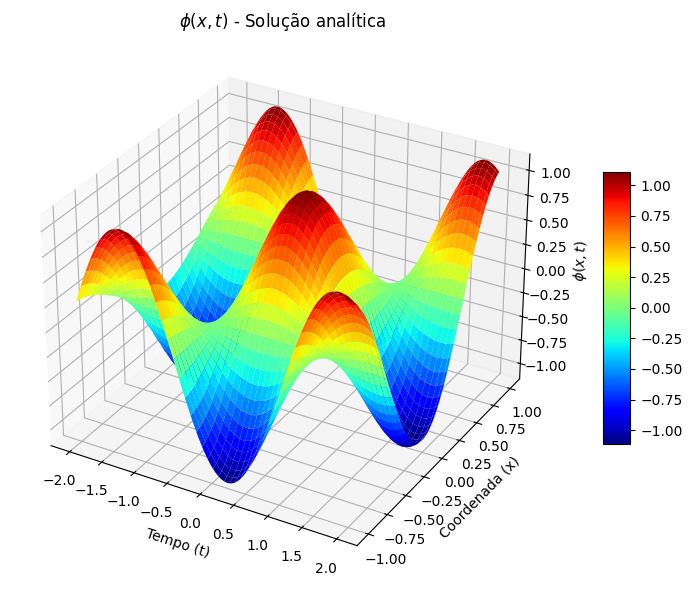

In [ ]:
# Solução Analítica da Equação de Klein-Gordon em 1D

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definição de parâmetros
A = 1
B = 0.5
mu = 2
massa = 1
lambda_ = (mu*mu) - massa

# Geração das malhas de x e t (produzindo o espaço-tempo do campo de Klein-Gordon)
x = np.linspace(-1, 1, 100)
t = np.linspace(-2, 2, 100)
T, X = np.meshgrid(t, x)

# Solução analítica
phi = np.cos(lambda_ * X) * (A * np.cos(mu * T) + B * np.sin(mu * T))

# Visualização em um gráfico 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(T, X, phi, cmap='jet')

ax.set_xlabel('Tempo (t)')
ax.set_ylabel('Coordenada (x)')
ax.set_zlabel(r'$\phi(x, t)$')
ax.set_title(r'$\phi(x, t)$ - Solução analítica')
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.tight_layout()
plt.show()

Se o leitor desejar, pode fazer variações nos parâmetros iniciais e observar diferentes formas de ondulações no campo $\phi$, o que destaca visualmente a íntima conexão da KGE com partículas, interações, modos de vibração, posições com o passar do tempo, etc. Para fins práticos, alteremos o código ligeiramente, considerando $\lambda = 2$ e mudando os limites do intervalo de espaço e de tempo. 

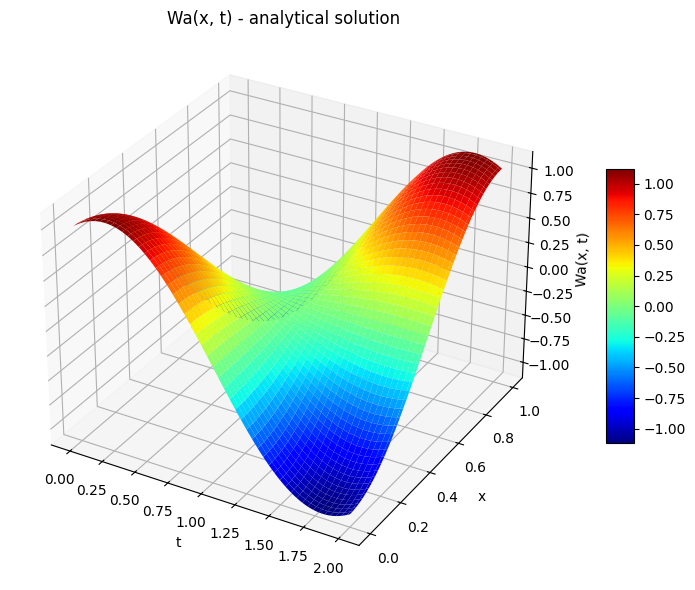

In [30]:
# Outra solução, agora com algumas alterações

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parâmetros 
A = 1
B = 0.5
lambda_ = np.pi 
mu = 2

# Geração das malhas de x e t
x = np.linspace(0, 1, 100)
t = np.linspace(0, 2, 100)
T, X = np.meshgrid(t, x)

# Solução analítica
Wa = np.cos(lambda_ * X) * (A * np.cos(mu * T) + B * np.sin(mu * T))

# Gráfico 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(T, X, Wa, cmap='jet')

# Estética
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('Wa(x, t)')
ax.set_title('Wa(x, t) - analytical solution')
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.tight_layout()
plt.show()

Talvez venha a surgir a dúvida do motivo de mudar os parâmetros e gerar outro gráfico, e é compreensivel, mas, para além de mostrar como variações de parâmetros alteram o campo $\phi$, este campo em específico será útil, por praticidade, para a continuação deste `notebook`.

## 2. O Método de Diferenças Finitas

Na área de física computacional, alguns métodos de cálculos numéricos foram desenvolvidos a partir de métodos analíticos mais complexos, visando utilizar a eficiência dos computadores para realizar cálculos que eram difíceis ou muito extensos. Um desses métodos é chamado Método de Diferenças Finitas, que mostra que a derivada de primeira ordem e de segunda ordem de uma função pode ser calculada por meio de um polinômio. Em termos matemáticos, pode-se dizer que, para uma dada função $u(x)$, suas derivadas primeira e segunda podem ser escritas como: 

$$\frac{du}{dx} \approx \frac{u(x + \Delta x) - u(x)}{\Delta x} ~~~ e ~~~ \frac{d^2u}{dx^2} \approx \frac{u(x + \Delta z) - 2u(x) + u(x - \Delta x)}{\Delta x^2}. \tag{1.12}$$

Este método é bastante simples de implementar e consideravelmente útil se quisermos resolver um problema linear e definido em malhas regulares. Este método, por outro lado, possui uma instabilidade acentuada com relação à passos de tempo inadequados (se considerarmos o nosso problema dinâmico) e exige cuidado com condições de contorno. Apesar disso, utilizaremos este método para modelar numericamente o campo de Klein-Gordon, já que nossa abordagem neste `notebook` é introdutória e simplificada, e não adotaremos condições extremas para tratar do problema.

## 3. A solução numérica da Equação de Klein-Gordon em 1D

O objetivo agora é construir uma expressão nova para a Equação de Klein-Gordon utilizando o Método de Diferenças Finitas, e que permita uma boa abordagem computacional. Em primeiro lugar, vamos discretizar as variáveis independentes da equação, ou seja, nossa coordenada $x$ e tempo $t$, de forma que eu consiga expressá-los por meio de passos e, consequentemente, discretizar o campo $\phi$. Adotemos que: 

$$ x_i = idx ~~~ e ~~~ t_n = ndt, \tag{1.13}$$

com $i = 0,1,2,..., N_x$ e $n = 0,1,2,...,N_t$. Assim, podemos escrever as derivadas de segunda ordem da KGE como:

$$\frac{\partial^2 \phi}{\partial t^2} \approx \frac{\phi_i^{n+1} - 2\phi_i^n + \phi_i^{n-1}}{dt^2} ~~~~~ e ~~~~~ \frac{\partial ^2\phi}{\partial x^2} \approx \frac{\phi_{i+1}^n - 2\phi_i^n + \phi_{i-1}^n}{dx^2}. \tag{1.14}$$

Colocando agora os termos encontrados na KGE, obtemos:

$$ \frac{\phi_i^{n+1} - 2\phi_i^n + \phi_i^{n-1}}{dt^2} - c^2(\frac{\phi_{i+1}^n - 2\phi_i^n + \phi_{i-1}^n}{dx^2}) + b\phi_i^n = 0, \tag{1.15} $$

e arranjando os termos, obtemos que:

$$ \frac{\phi_i^{n+1} - 2\phi_i^n + \phi_i^{n+1}}{dt^2} = c^2 ( \frac {\phi_{i+1}^n - 2\phi_i^n + \phi_{i-1}^n}{dx^2} ) - b\phi_i^n. \tag{1.16} $$

Por fim, colocando em termos gerais, o campo discretizado $\phi_i^{n+1}$ pode ser escrito como:

$$\phi_i^{n+1} = 2\phi_i^n - \phi_i^{n-1} + dt^2(c^2\frac{\phi_{i+1}^n - 2\phi_i^n + \phi_{i-1}^n}{dx^2} - m^2\phi_i^n). \tag{1.15}$$

Agora que há um método numérico explícito para calcular e modelar o campo de Klein-Gordon, podemos, por meio de Python, visualizar seu comportamento ao longo do tempo, assim como fizemos com a solução analítica. Dessa maneira, escrevemos no código os parâmetros iniciais bem como as quantidade $dx$ e $dt$, explicitados no método numérico. Em seguida, definiu-se o espaço-tempo em que a simulação ocorre, baseado nos limites de pontos espaciais e temporais, juntamente com as constantes da equação, que foram baseadas no gráfico de $\phi$ anterior. Definindo a solução analítica como condição inicial e definindo também a matriz onde a solução numérica respeitará condições de contorno bem definidas, escrevemos explicitamente a expressão encontrada $\phi_i^n$ dentro de um loop duplo, em passos de j e i, que no caso da equação discreta encontrada, são os índices n e i, respectivamente.

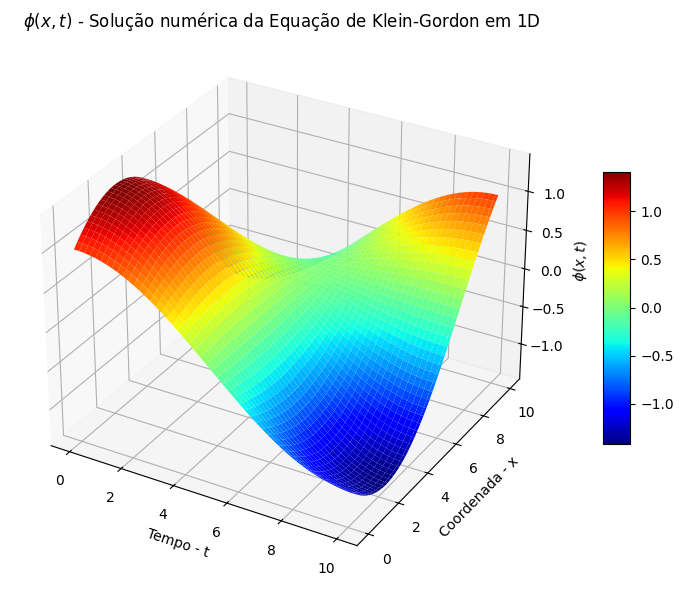

In [2]:
# Solução numérica da Equação de Klein-Gordon em 1D por meio do Método de Diferenças Finitas

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parâmetros iniciais
L = 10        # Comprimento da malha espacial
T = 10        # Tamanho da malha temporal
Nx = 100      # Número de pontos espaciais
Nt = 300      # Número de pontos temporais
dx = L / (Nx - 1)
dt = T / (Nt - 1)

# Malhas de espaço e tempo
x = np.linspace(0, L, Nx)
t = np.linspace(0, T, Nt)
X, T_grid = np.meshgrid(t, x)

# Constantes da KGE
a = 1.0
lambda_ = np.pi / L
mu = np.pi / T
b = - (lambda_**2 * a**2) + mu**2

# Solução analítica usada como condição inicial
SOLanalitica = np.cos(lambda_ * x[:, None]) * (np.cos(mu * t[None, :]) + np.sin(mu * t[None, :]))

# Inicialização da matriz de solução numérica
Solnum = np.zeros((Nx, Nt))
Solnum[:, 0:2] = SOLanalitica[:, 0:2]      # Condições iniciais
Solnum[0, :] = SOLanalitica[0, :]          # Condição de contorno esquerda
Solnum[-1, :] = SOLanalitica[-1, :]        # Condição de contorno direita

# Cálculo da solução numérica (método de diferenças finitas)
for j in range(1, Nt - 1):
    for i in range(1, Nx - 1):
        Solnum[i, j+1] = (dt**2 * ((a/dx)**2 * (Solnum[i+1, j] - 2*Solnum[i, j] + Solnum[i-1, j]) - b * Solnum[i, j])
                      + 2*Solnum[i, j] - Solnum[i, j-1])

# Plotagem 3D da solução numérica
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(T_grid, X, Solnum, cmap='jet', edgecolor='none')
ax.set_title(r'$\phi(x,t)$ - Solução numérica da Equação de Klein-Gordon em 1D')
ax.set_xlabel('Tempo - t')
ax.set_ylabel('Coordenada - x')
ax.set_zlabel(r'$\phi(x,t)$')
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.tight_layout()
plt.show()

É perceptível que o método numérico resultou em um campo $\phi(x,t)$ muito semelhante ao obtido por meio da solução analítica, dado de antemão que ambos respeitem as mesmas condições iniciais e de contorno, que são considerações importantes para comparar quaisquer soluções analíticas e numéricas de problemas físicos de froma adequada. É perceptível também, pela solução numérica, o caráter ondulatório de $\phi$ ao longo do tempo, como era de se esperar para a KGE. O leitor pode também experimentar variar as condições iniciais e de contorno, verificando propriedades e formatos interessantes da Equação de Klein-Gordon em 1D.

## 4. Conclusão

Fale de que o metodo foi satisfatorio, e apresente o gráfico do erro

Neste `notebook`, vimos a utilização do método da separação de variáveis para resolver analiticamente a Equação de Klein-Gordon em 1D e vimos também o método de Diferenças Finitas, com o qual obtemos uma aproximação numérica da KGE 1D. Após análises do resultado de ambos os métodos, percebe-se a equivalência de ambas nesse formato simplificado de tratar a Equação de Klein-Gordon. Isso deve ser apontado, em parte, por razão das condições iniciais e de contorno da nossa equação, que torna ambas as soluções equivalente, mas em parte também para os métodos utilizados, que abordam uma solução clássica e fácil de uma equação que descreve comportamentos relativísticos e até sistemas físicos muito mais complexos. Para mensurar de forma quantitativa os bons resultados numéricos em comparação aos analíticos, é necessário mostrar um gráfico de erro absoluto entre ambas as soluções. Nele, tanto a solução analítica quanto a solução numérica são apresentados e calculados, mas o que temos como resultado é a equação do erro absoluto, que calcula a diferença entre os pontos da solução numérica e os pontos da solução analítica.

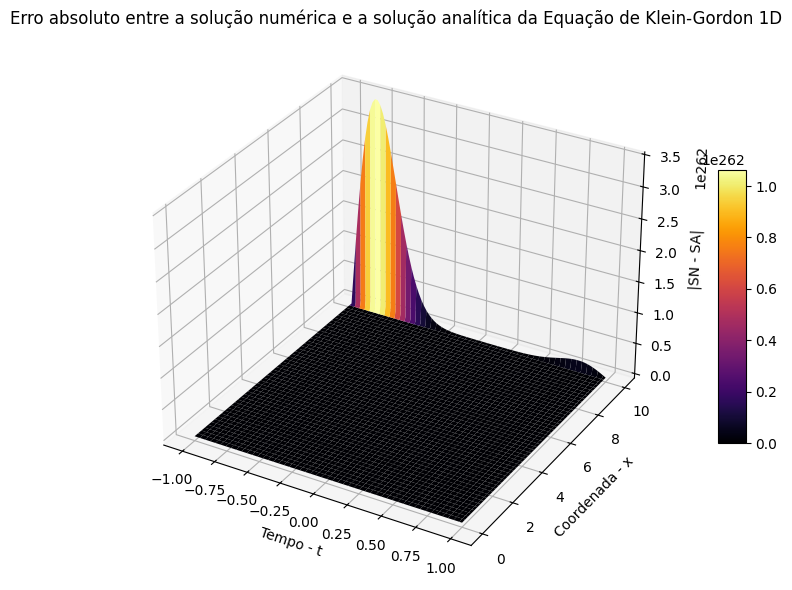

In [5]:
# erro absoluto

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parâmetros da malha
L = 2        # comprimento espacial total (para x ∈ [-1, 1])
T = 10       # tempo total
Nx = 100     # número de pontos no espaço
Nt = 200     # número de pontos no tempo
dx = L / (Nx - 1)
dt = T / (Nt - 1)

# Malhas de espaço e tempo
x = np.linspace(-1, 1, Nx)
t = np.linspace(0, T, Nt)
X, T_grid = np.meshgrid(t, x)

# Parâmetros físicos
A = 1
B = 0.5
lambda_ = np.pi
mu = 2
a = 1.0
b = - (lambda_**2 * a**2) + mu**2

# Solução analítica
SA = np.cos(lambda_ * X) * (A * np.cos(mu * T_grid) + B * np.sin(mu * T_grid))

# Inicialização da solução numérica
SN = np.zeros((Nx, Nt))
SN[:, 0] = SA[:, 0]         # t = 0
SN[:, 1] = SA[:, 1]         # t = dt
SN[0, :] = SA[0, :]         # x = -1
SN[-1, :] = SA[-1, :]       # x = 1

# Método de diferenças finitas para resolver numericamente
for j in range(1, Nt - 1):
    for i in range(1, Nx - 1):
        SN[i, j+1] = (dt**2 * ((a / dx)**2 * (SN[i+1, j] - 2*SN[i, j] + SN[i-1, j]) - b * SN[i, j])
                      + 2 * SN[i, j] - SN[i, j-1])

# Cálculo do erro absoluto
erro_absoluto = np.abs(SN - SA)

# Plot do erro absoluto em 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(T_grid, X, erro_absoluto, cmap='inferno', edgecolor='none')

ax.set_xlabel('Tempo - t')
ax.set_ylabel('Coordenada - x')
ax.set_zlabel('|SN - SA|')
ax.set_title('Erro absoluto entre a solução numérica e a solução analítica da Equação de Klein-Gordon 1D')
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.tight_layout()
plt.show()


Observa-se, a partir do resultado do código que calcula o erro absoluto entre os métodos, que a maior pare do gráfico tem valor nulo, o que mostra que ambas as soluções são, aproximadamente, iguais quantitativamente, e qualitativamente equivalentes. É perceptível também um pico acentuado na borda do gráfico. Tal pico de erro de tamanho considerável pode ser entendido como fruto das limitações do método de Diferenças Finitas, que é sensível a condições de contorno, logo, seria de se esperar que, na borda do sistema em questão, o valor da solução numérica poderia explodir e, no cálculo do erro, este alto valor seria visível.
Apesar de termos trabalhado com métodos simplificados e adotarmos uma abordagem introdutória para a equação de Klein-Gordon, isto não limita seu estudo a simples métodos numéricos ou cálculos de soluções de equações diferenciais básicas. A Equação de Klein-Gordon, como já mensionado, descreve partículas de spin nulo, bem como interações, potenciais, etc. Em razão disso, existem diversos métodos de resolver a KGE para diversos sistemas diferentes. Como foi citado, a solução mais completa da Equação de Klein-Gordon é encontrada por Transformadas de Fourier, e isso permite que outros métodos computacionais melhores e mais eficientes possam resolver a mesma equação de forma equivalente., permitindo encontrar também outros tipos de características dos campos de partículas no espaço-tempo. Pensando um pouco mais longe, a KGE pode ser utilizada para descrever o campo de um sistema de partículas que interagem entre si, ou particulas que, ao longo do tempo, não possuem uma natureza linear, além de ser possível, por meio da Equação de Klein-Gordon, descrever o espaço de momento e de energia de uma ou várias partículas no espaço, interagentes ou não.

## 5. Referências

**[1]** *Mark Newman - Computational Physics (2013, University of Michigan)*

**[2]** *M.E.Peskin and D.V.Schroeder - An introduction to Quantum Field Theory (1995, Addison-Wesley)*

**[3]** *Vladimirov, V. S., Mikhailov, V. P., Vasharin A. A., et al. - Collection of Problems on Mathematical Physics Equations (1974, Nauka, Moscow)*

**[4]** *Robert C. Helling - Solving classical field equations (Ludwig-Maximilians-Universitat Munchen)*